In [1]:
from stesml.model_tools import train_model
from stesml.model_tools import test_model
from stesml.model_tools import get_T_from_h_results

from stesml.plot_tools import plot_results
from stesml.plot_tools import plot_average_error

from stesml.stes_model import stes_model

/Users/kmenear/Projects/sulfur_tes_ml/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
plot = False

In [3]:
# Model names
# NN model truncated at t <= 360: 'NN_20220708-22'
# NN model for full run time: 'NN_20220708-23'
# XGBoost model for full run time 'XGBoost_20220711-1554'
# XGBoost model truncated at t >= 360 'XGBoost_20220709-0914'

In [4]:
# Train the XGBoost model for t >= 360

data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'XGBoost_20220711-1554'
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
t_min = -1
truncated = True

In [5]:
train_model_ = True
save_model_ = False
load_model_ = True

In [6]:
if train_model_:
    parameters = stes_model.get_parameters(model_type, truncated)
    model, addendum = train_model(data_dir, model_type, target, scale, parameters, t_min=t_min)

[22:50:45] WARNING: ../src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	val-rmse:90.28800
[20]	val-rmse:34.96967



KeyboardInterrupt



In [7]:
if save_model_:
    stes_model.save_model(model, model_type, addendum)

In [8]:
if load_model_:
    model, addendum = stes_model.load_model(model_type, model_name)

In [9]:
t_min = -1 # If building final model, set t_min to -1 here
h_results = test_model(model, model_type, data_dir, target, scale, addendum, t_min)

RMSE: 2.6456137, R2: 0.9989737


In [10]:
h_df = h_results['test_df']

In [11]:
if plot:
    avg_error = plot_average_error(h_df, target=target, t_min=t_min)

In [12]:
if plot:
    (h_df['h'] - h_df['h_hat']).hist(bins=20, range=(-30, 30))

In [13]:
if plot:
    plot_results(h_df, model_type, target='h')

In [14]:
# Train the NN model for t <= 360

data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'NN_20220708-22'
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True # Normalize data to a mean of 0 and STD of 1
t_max=360
truncated=True

In [15]:
train_model_ = False
save_model_ = False
load_model_ = True

In [16]:
if train_model_:
    parameters = stes_model.get_parameters(model_type, truncated)
    model, addendum = train_model(data_dir, model_type, target, scale, parameters, t_max=t_max)

In [17]:
if save_model_:
    stes_model.save_model(model, model_type, addendum)

In [18]:
if load_model_:
    model, addendum = stes_model.load_model(model_type, model_name)

2022-07-20 22:12:37.179608: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
t_max = -1 # If building final model, set t_max to -1 here
T_results = test_model(model, model_type, data_dir, target, scale, addendum, t_max=t_max)

2022-07-20 22:12:41.078827: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


RMSE: 118.8024065, R2: -4.9438996


In [20]:
T_df = T_results['test_df']

In [21]:
h_df['Tavg_hat'] = T_df['Tavg_hat']

In [22]:
if plot:
    avg_error = plot_average_error(T_df, target=target, t_max=t_max)

In [23]:
if plot:
    (T_df['Tavg'] - T_df['Tavg_hat']).hist(bins=20, range=(-30, 30))

In [24]:
if plot:
    plot_results(T_df, model_type, target='Tavg')

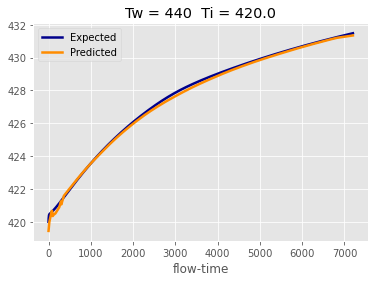

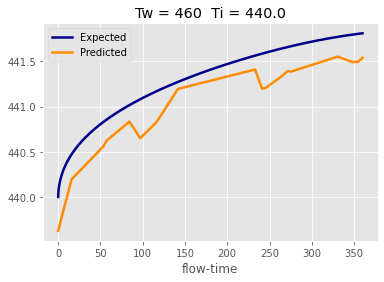

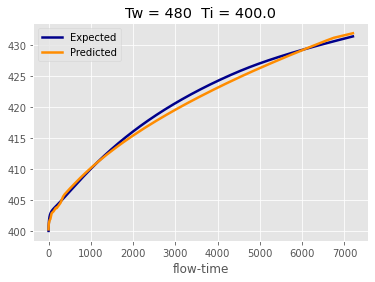

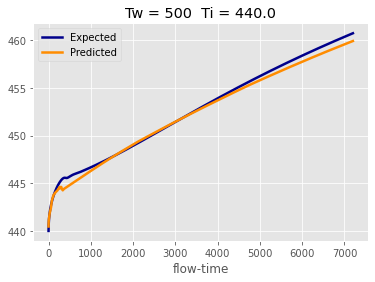

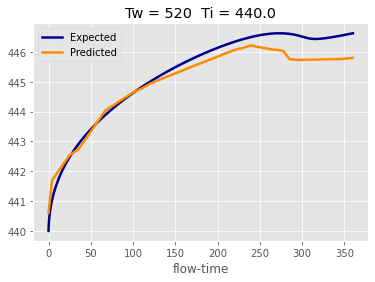

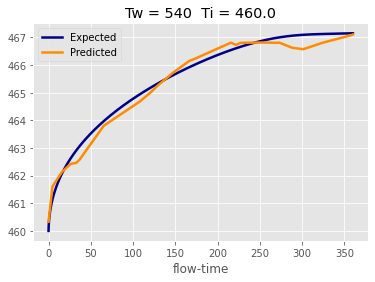

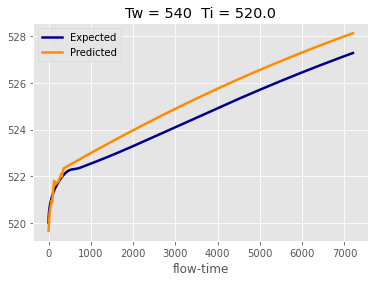

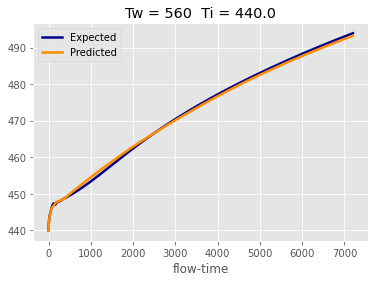

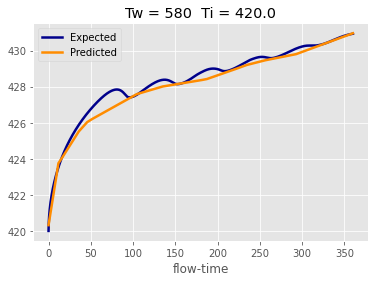

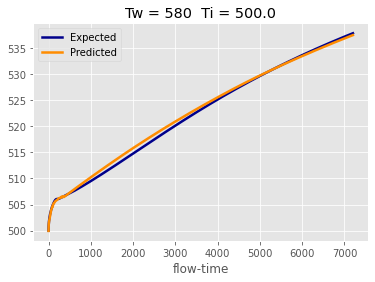

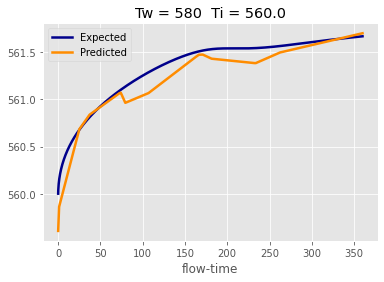

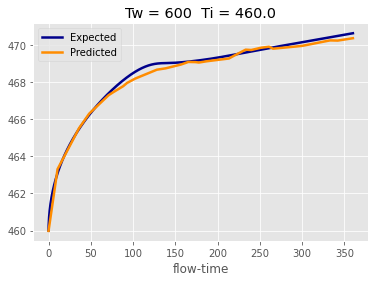

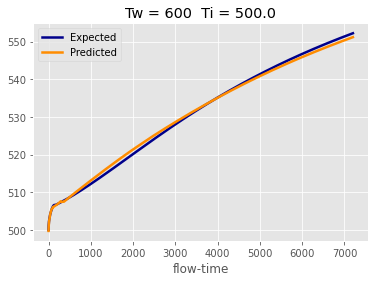

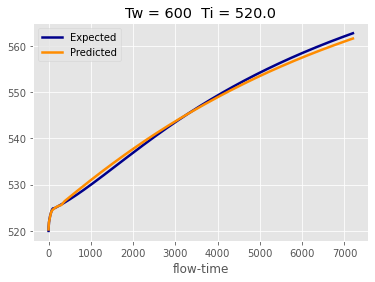

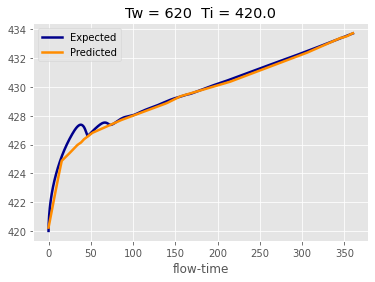

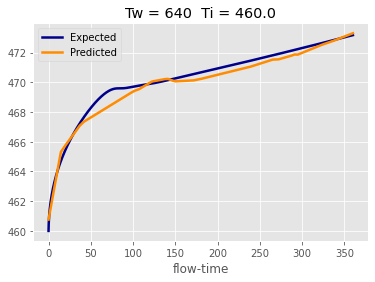

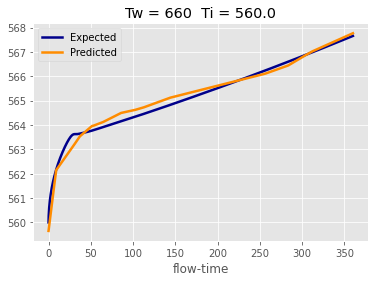

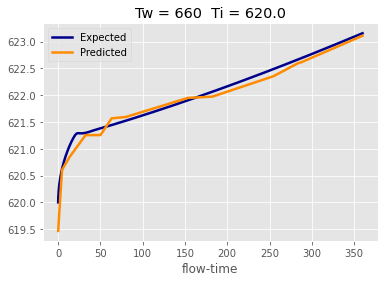

In [25]:
rmse, r2 = get_T_from_h_results(h_df, plot=True, hybrid_model=True, hybrid_split_time=360)

In [26]:
print(rmse)

0.6131214373808936


In [27]:
print(r2)

0.999841687942062
